# Exercise 3: More xarray

## Aim: Work with data which has been grouped and create masks for data.

### Issues Covered:
- Grouping data with `.groupby()`
- Applying functions to data with `.apply()`
- Create masks using `.where()` 

## 1. GroupBy processing

1. Group the temperature data by time, look at the results.

In [1]:
import xarray as xr
ds = xr.open_dataset('../data/tas_rcp45_2055_mon_avg_change.nc')
temperature = ds["tas"]
temperature.groupby('time')

DataArrayGroupBy, grouped over 'time'
12 groups with labels 2065-01-30, 12:00:00, ..., 206....

2. Create a function to calculate the mean. Apply this function across the data grouped by time and plot.

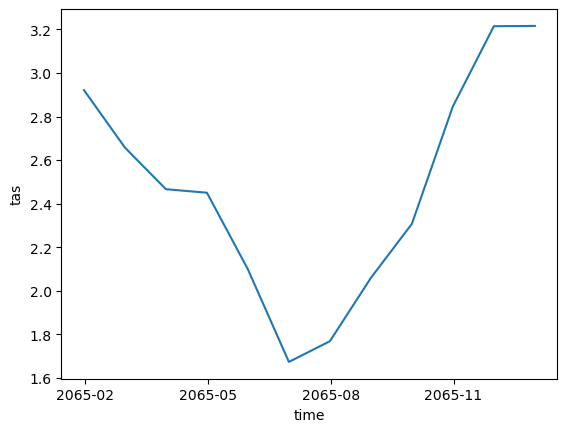

In [2]:
def mean(x):
    return x.mean()

temperature.groupby('time').apply(mean).plot()

3. Repeat the step above but using the shortcut shown in the tutorial.

(array([1.60000e+01, 3.40500e+03, 4.99885e+05, 2.05252e+05, 3.77090e+04,
        1.29990e+04, 6.29100e+03, 6.46200e+03, 3.75200e+03, 1.82900e+03]),
 array([-6.73379803, -3.77037883, -0.80695951,  2.15645981,  5.11987877,
         8.08329773, 11.04671764, 14.0101366 , 16.97355652, 19.93697548,
        22.90039444]),
 <BarContainer object of 10 artists>)

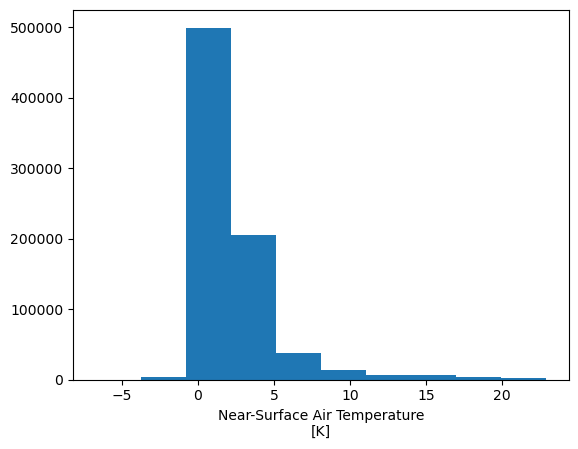

In [3]:
# Why is this not right? 
temperature.groupby('time').mean().plot()

4. Try to calculate the global annual average instead of the daily global average and plot the results as a 1D time series.

In [4]:
# Not sure how to do this? 

5. Plot the maximum temperature change across the data grouped by time.

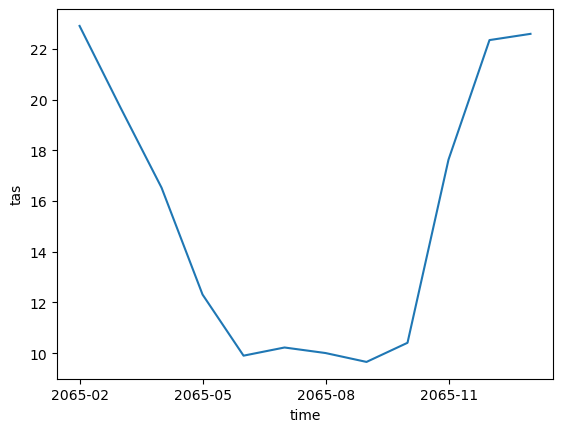

In [5]:
# Why is this not right?
# temperature.groupby('time').max().plot()
def max(x):
    return x.max()

temperature.groupby('time').apply(max).plot()

6. Plot the minimum temperature change across the data grouped by time.

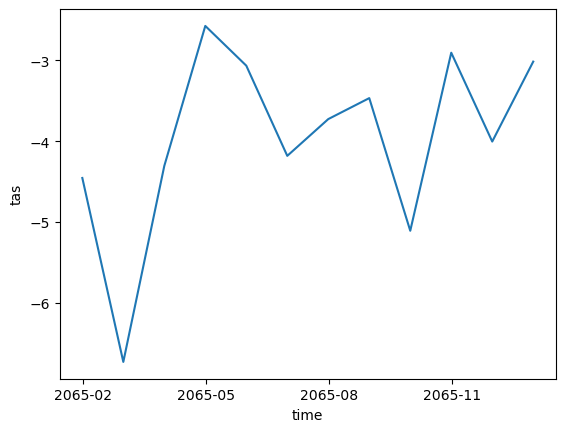

In [6]:
# Why does this not work:
# temperature.groupby('time').min().plot()
def min(x):
    return x.min()

temperature.groupby('time').apply(min).plot()

7. Let's have a look at the seasonal variations in temperature data. Create a dataset which is grouped by the months january and february, and a second dataset for june/jul/aug. Apply the mean on both of these over the time dimension. Find the range by subracting the winter months from the summer months. Plot the range.

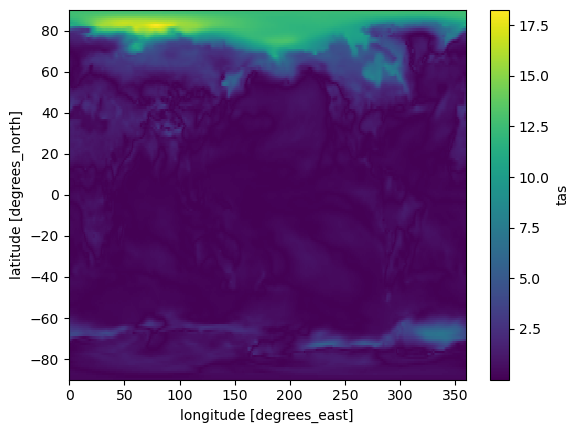

In [7]:
grouped_by_seasons = temperature.groupby('time.season').mean('time')
temp_range = abs(grouped_by_seasons.sel(season='JJA') - grouped_by_seasons.sel(season='DJF'))
temp_range.plot()

## 2. Masking

1. Determine which grid cells have a temperature difference greater than 1.0 on the 30th June 2065. Plot the results.

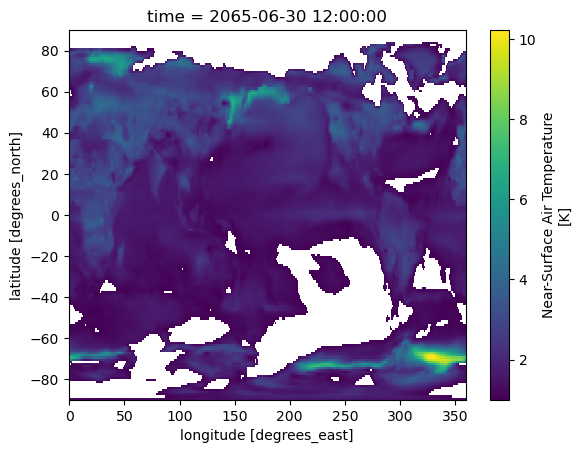

In [8]:
ds.sel(time='2065-06-30')['tas'].where(ds.tas > 1.0).plot()

2. Plot the sst field to take a look what the land surfaces currently look like.

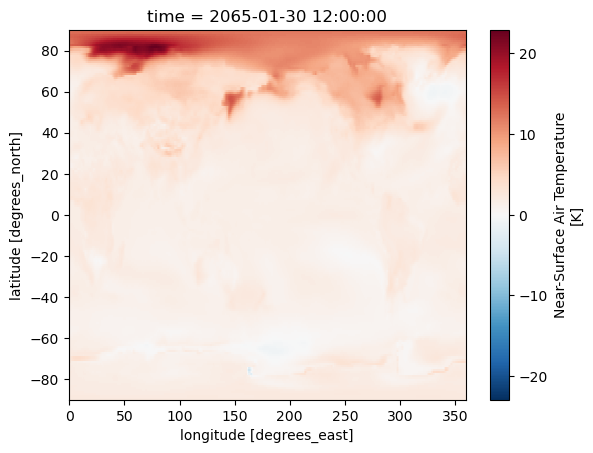

In [9]:
ds.tas.isel(time=0).plot()

3. Build a mask over the land aread using the numpy library to help. We'll be going over numpy later in the course.

In [10]:
# This doesn't work with this dataset :/

# import numpy as np
# mask_ocean = 2 * np.ones((ds.dims['lat'], ds.dims['lon'])) * np.isfinite(ds.tas.isel(time=0))
# mask_land = 1 * np.ones((ds.dims['lat'], ds.dims['lon'])) * np.isnan(ds.tas.isel(time=0))
# mask_array = mask_ocean + mask_land
# mask_array.plot()

4. Add the mask to the coordinates data array. Take a look at the data array to check it's been added.

In [11]:
# Doesn't work with this dataset

# ds.coords['mask'] = (('lat', 'lon'), mask_array)
# ds

5. Apply the mask from the data array using where and integrate with the mean.

In [12]:
# Doesn't work with this dataset
# ds['tas'].mean('time').where(ds.mask == 1).plot()

6. Extension question: Using the air temperature dataset, calculate the mean annual difference in SST (sea surface temperature) and tas?

In [13]:
# Not sure how to do this?